<a href="https://colab.research.google.com/github/kashindra-mahato/Computer-Vision/blob/main/keras_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import keras
from keras import layers

In [ ]:
inputs = keras.Input(shape=(784,), name="digits")
x = layers.Dense(64, activation="relu", name="dense_1")(inputs)
x = layers.Dense(64, activation="relu", name="dense_2")(x)
outputs = layers.Dense(10, activation="softmax", name="predictions")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
# dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# Preprocess data
x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255

y_train = y_train.astype("float32")
y_test = y_test.astype("float32")

# Reserve 10,000 samples for validation
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]

In [ ]:
model.compile(
    optimizer=keras.optimizers.RMSprop(),
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=[keras.metrics.SparseCategoricalAccuracy()]
)

In [ ]:
history = model.fit(
              x=x_train,
              y=y_train,
              batch_size=64,
              epochs=2,
              validation_data=(x_val, y_val),
          )

Epoch 1/2
782/782 [==============================] - 8s 8ms/step - loss: 0.3557 - sparse_categorical_accuracy: 0.8994 - val_loss: 0.1819 - val_sparse_categorical_accuracy: 0.9495
Epoch 2/2
782/782 [==============================] - 5s 7ms/step - loss: 0.1674 - sparse_categorical_accuracy: 0.9508 - val_loss: 0.1293 - val_sparse_categorical_accuracy: 0.9640


In [ ]:
history.history

{'loss': [0.3557358980178833, 0.16738352179527283],
 'sparse_categorical_accuracy': [0.8993600010871887, 0.9508200287818909],
 'val_loss': [0.18185223639011383, 0.12925207614898682],
 'val_sparse_categorical_accuracy': [0.9495000243186951, 0.9639999866485596]}

In [ ]:
print(f"Test loss, Test acc: {model.evaluate(x_test, y_test, batch_size=128)}")

79/79 [==============================] - 1s 11ms/step - loss: 0.1288 - sparse_categorical_accuracy: 0.9599
Test loss, Test acc: [0.12880362570285797, 0.9599000215530396]


In [ ]:
predictions = model.predict(x_test[:3])

1/1 [==============================] - 0s 459ms/step


In [ ]:
predictions.shape

(3, 10)

In [ ]:
def get_uncompiled_model():
  inputs = keras.Input(shape=(784,), name="digits")
  x = layers.Dense(64, activation="relu", name="dense_1")(inputs)
  x = layers.Dense(64, activation="relu", name="dense_2")(x)
  outputs = layers.Dense(10, activation="softmax", name="predictions")(x)
  model = keras.Model(inputs=inputs, outputs=outputs)
  return model

In [ ]:
def get_uncompiled_model():
  model = get_uncompiled_model()
  model.compile(
      optimizer="rmsprop",
      loss="sparse_categorical_crossentropy",
      metrics=["sparse_categorical_accuracy"],
  )
  return model

In [ ]:
# Passing data to multi input and multi output models
image_input = keras.Input(shape=(32, 32, 3), name="img_input")
timeseries_input = keras.Input(shape=(None, 10), name="ts_input")

x1 = layers.Conv2D(3, 3)(image_input)
x1 = layers.GlobalMaxPooling2D()(x1)

x2 = layers.Conv1D(3, 3)(timeseries_input)
x2 = layers.GlobalMaxPooling1D()(x2)

x = layers.concatenate([x1, x2])

score_output = layers.Dense(1, name="score_output")(x)
class_output = layers.Dense(5, name="class_output")(x)

model = keras.Model(
    inputs=[image_input, timeseries_input], outputs=[score_output, class_output]
)

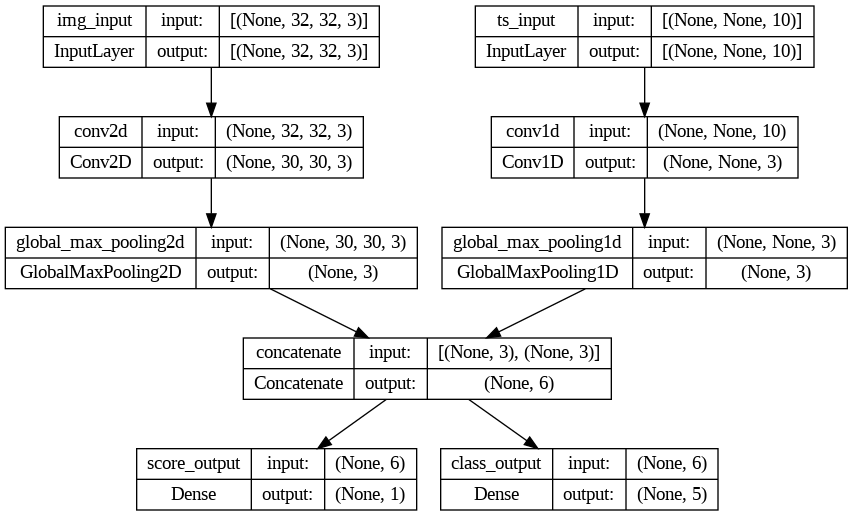

In [ ]:
keras.utils.plot_model(model, "multi_input_and_output_model.png", show_shapes=True)

In [ ]:
model.compile(
    optimizer=keras.optimizers.RMSprop(1e-3),
    loss={
        "score_output": keras.losses.MeanSquaredError(),
        "class_output": keras.losses.CategoricalCrossentropy(),
    },
    metrics={
        "score_output": [
            keras.metrics.MeanAbsolutePercentageError(),
            keras.metrics.MeanAbsoluteError(),
        ],
        "class_output": [keras.metrics.CategoricalAccuracy()],
    },
    loss_weights={
        "score_output": 2.0, "class_output": 1.0
    }
)

In [ ]:
import numpy as np

In [ ]:
# Generate dummy NumPy data
img_data = np.random.random_sample(size=(100, 32, 32, 3))
ts_data = np.random.random_sample(size=(100, 20, 10))
score_targets = np.random.random_sample(size=(100, 1))
class_targets = np.random.random_sample(size=(100, 5))

In [ ]:
# model.compile(
#     optimizer=keras.optimizers.RMSprop(1e-3),
#     loss=[keras.losses.MeanSquaredError(), keras.losses.CategoricalCrossentropy()],
# )

In [ ]:
model.fit(
    {"img_input": img_data, "ts_input": ts_data},
    {"score_output": score_targets, "class_output": class_targets},
    batch_size=32,
    epochs=1,
)

4/4 [==============================] - 2s 28ms/step - loss: 17.3037 - score_output_loss: 0.2552 - class_output_loss: 16.7932 - score_output_mean_absolute_percentage_error: 149.8958 - score_output_mean_absolute_error: 0.4254 - class_output_categorical_accuracy: 0.1900


In [ ]:
# The ModelCheckpoint callback can be used to implement fault-tolerance
import os

# Prepare a directory to store all the checkpoints
checkpoint_dir = "./ckpnt"
if not os.path.exists(checkpoint_dir):
  os.makedirs(checkpoint_dir)

In [ ]:
# def make_or_restore_model():
#   # Either restore the latest model, or create a fresh one
#   # if there is no checkpoint available
#   checkpoints = [checkpoint_dir + "/" + name for name in os.listdir(checkpoint_dir)]
#   if checkpoints:
#     latest_checkpoint = max(checkpoints, key=os.path.getctime)
#     print("Restoring from", latest_checkpoint)
#     return keras.models.load_model(latest_checkpoint)
#   print("Creating a new model")
#   return get_uncompiled_model()

# model = make_or_restore_model()
# callbacks = [
#     keras.callbacks.ModelCheckpoint(
#         filepath=checkpoint_dir + "/model-loss={loss:.2f}", save_freq=100
#     )
# ]
# model.fit(x_train, y_train, epochs=1, callbacks=callbacks)

In [ ]:
class CustomModel(keras.Model):
  def __init__(self, *args, **kwargs):
    super().__init__(*args, **kwargs)
    self.loss_tracker = keras.metrics.Mean(name="loss")
    self.mae_metric = keras.metrics.MeanAbsoluteError(name="mae")

  def train_step(self, data):
    # Unpack the data, Its structure depends on your model and
    # on what you pass to 'fit()'.
    x, y = data

    with tf.GradientTape() as tape:
      y_pred = self(x, training=True) # Forward pass
      ##  Compute the loss value
      ## (the loss function is configured in 'compile()')
      # loss = self.compute_loss(y=y, y_pred=y_pred)

      # Compute our own loss
      loss = keras.losses.mean_squared_error(y, y_pred)

    # Compute gradients
    trainable_vars = self.trainable_variables
    gradients = tape.gradient(loss, trainable_vars)
    # update weights
    self.optimizer.apply_gradients(zip(gradients, trainable_vars))
    # # update metrics (includes the metric that tracks the loss)
    # for metric in self.metrics:
    #   if metric.name == "loss":
    #     metric.update_state(loss)
    #   else:
    #     metric.update_state(y, y_pred)

    # compute our own metrics
    self.loss_tracker.update_state(loss)
    self.mae_metric.update_state(y, y_pred)

    # # Return a dict mapping metric names to current value
    # return {m.name: m.result() for m in self.metrics}

    return {"loss": self.loss_tracker.result(), "mae":self.mae_metric.result()}

  @property
  def metrics(self):
    """ we list our 'Metrics' objects here so that 'reset_states()' can be
    called automatically at the start of each epoch
    or at the start of 'evaluate()'.
    if you don't implement this property, you have to call
    'reset_states()' yourself at the time of your choosing
    """
    return [self.loss_tracker, self.mae_metric]

In [ ]:
# Construct and compile an instance of CustomModel
inputs = keras.Input(shape=(32,))
outputs = keras.layers.Dense(1)(inputs)
model = CustomModel(inputs, outputs)
# model.compile(optimizer="adam", loss="mse", metrics=['mae'])

# We don't pass a loss or metrics here
model.compile(optimizer="adam")

x = np.random.random((1000,32))
y = np.random.random((1000, 1))

model.fit(x, y, epochs=3)

Epoch 1/3
32/32 [==============================] - 1s 4ms/step - loss: 2.9601 - mae: 1.6342
Epoch 2/3
32/32 [==============================] - 0s 4ms/step - loss: 1.5879 - mae: 1.1515
Epoch 3/3
32/32 [==============================] - 0s 11ms/step - loss: 0.8187 - mae: 0.7783


In [ ]:
# GAN
# create a discriminator
discriminator = keras.Sequential(
    [
        keras.Input(shape=(28, 28, 1)),
        layers.Conv2D(64, (3,3), strides=(2, 2), padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(128, (3, 3), strides=(2, 2), padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.GlobalMaxPooling2D(),
        layers.Dense(1),
    ],
    name="descriminator",
)

# create a generator
latent_dim = 128
generator = keras.Sequential(
    [
        keras.Input(shape=(latent_dim,)),
        # We want to generate 128 coefficients to reshape into a 7X7X128 map
        layers.Dense(7 * 7 * 128),
        layers.LeakyReLU(alpha=0.2),
        layers.Reshape((7, 7, 128)),
        layers.Conv2DTranspose(128, (4, 4), strides=(2, 2), padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2DTranspose(128, (4, 4), strides=(2, 2), padding="same"),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2D(1, (7,7), padding="same", activation="sigmoid",)
      ],
    name="generator",
)

In [ ]:
class GAN(keras.Model):
  def __init__(self, discriminator, generator, latent_dim):
    super().__init__()
    self.discriminator = discriminator
    self.generator = generator
    self.latent_dim = latent_dim
    self.d_loss_tracker = keras.metrics.Mean(name="d_loss")
    self.g_loss_tracker = keras.metrics.Mean(name="g_loss")

  def compile(self, d_optimizer, g_optimizer, loss_fn):
    super().compile()
    self.d_optimizer = d_optimizer
    self.g_optimizer = g_optimizer
    self.loss_fn = loss_fn

  def train_step(self, real_images):
    if isinstance(real_images, tuple):
      real_images = real_images[0]
    # sample random points in the latent space
    batch_size = tf.shape(real_images)[0]
    random_latent_vectors = tf.random.normal(shape=(batch_size, self.latent_dim))

    # Decode them to fake images
    generated_images = self.generator(random_latent_vectors)

    # Combine them with real images
    combined_images = tf.concat([generated_images, real_images], axis=0)

    # Assemble labels discriminating real from fake images
    labels = tf.concat(
        [tf.ones((batch_size, 1)), tf.zeros((batch_size, 1))], axis=0
    )
    # Add random noise to the labels - important trick!
    labels += 0.05 * tf.random.uniform(tf.shape(labels))

    # Train the discriminator
    with tf.GradientTape() as tape:
      predictions = self.discriminator(combined_images)
      d_loss = self.loss_fn(labels, predictions)
    grads = tape.gradient(d_loss, self.discriminator.trainable_weights)
    self.d_optimizer.apply_gradients(
        zip(grads, self.discriminator.trainable_weights)
    )
    # Sample random points in the latent space
    random_latent_vectors = tf.random.normal(shape=(batch_size, self.latent_dim))

    # Assemble labels that say "all real images"
    misleading_labels = tf.zeros((batch_size, 1))

    # Train the generator (note that we should *not* update the weights
    # of the discriminator!)
    with tf.GradientTape() as tape:
      predictions = self.discriminator(self.generator(random_latent_vectors))
      g_loss = self.loss_fn(misleading_labels, predictions)
    grads = tape.gradient(g_loss, self.generator.trainable_weights)
    self.g_optimizer.apply_gradients(zip(grads, self.generator.trainable_weights))

    # Update metrics and return their value
    self.d_loss_tracker.update_state(d_loss)
    self.g_loss_tracker.update_state(g_loss)
    return {
        "d_loss": self.d_loss_tracker.result(),
        "g_loss": self.g_loss_tracker.result(),
    }

In [ ]:
# Prepare the dataset. We use both the training and test MNIST digits
batch_size = 64
(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()
all_digits = np.concatenate([x_train, x_test])
all_digits = all_digits.astype("float32") / 255.0
all_digits = np.reshape(all_digits, (-1, 28, 28, 1))
dataset = tf.data.Dataset.from_tensor_slices(all_digits)
dataset = dataset.shuffle(buffer_size=1024).batch(batch_size)

gan = GAN(discriminator=discriminator, generator=generator, latent_dim=latent_dim)
gan.compile(
    d_optimizer = keras.optimizers.Adam(learning_rate=0.0003),
    g_optimizer = keras.optimizers.Adam(learning_rate=0.0003),
    loss_fn = keras.losses.BinaryCrossentropy(from_logits=True),
)

In [ ]:
gan.fit(dataset.take(100), epochs=1)

100/100 [==============================] - 286s 3s/step - d_loss: 0.5446 - g_loss: 0.8146


In [ ]:
# writing a training loop from scratch
inputs = keras.Input(shape=(784,), name="digits")
x1 = layers.Dense(64, activation="relu")(inputs)
x2 = layers.Dense(64, activation="relu")(x1)
outputs = layers.Dense(10, name="predictions")(x2)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
# Training it using mini-batch gradient with a custom training loop
# Instantiate an optimizer
optimizer = keras.optimizers.SGD(learning_rate=1e-3)
# Instantiate a loss function
loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Prepare the training datasets
batch_size = 64
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = np.reshape(x_train, (-1, 784))
x_test = np.reshape(x_test, (-1, 784))

# Reserve 10,000 samples for validation
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]

# Prepare the training dataset
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch_size)

# Prepare the validation dataset
val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
val_dataset = val_dataset.batch(batch_size)

In [ ]:
epochs = 2
for epoch in range(epochs):
  print(f"\nStart of epoch {epoch}")

  # Iterate over the batches of the dataset
  for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):
    # Open a GradientTape to record the operations run
    # during the forward pass, which enabels auto differentiation
    with tf.GradientTape() as tape:
      # Run the forward pass of the layer
      # The operations that the layer applies to
      # its input are going to be recorded on the tape
      logits = model(x_batch_train, training=True) # Logits for this minibatch

      # Compute the loss value for this minibatch
      loss_value = loss_fn(y_batch_train, logits)

    # Use the gradients tape to automatically retrieve the gradients
    # of the trainable variables with respect to the loss
    grads = tape.gradient(loss_value, model.trainable_weights)

    # Run one step of gradient descent by updating
    # the value of the variable to minimize the loss
    optimizer.apply_gradients(zip(grads, model.trainable_weights))

    # log every 200 batches
    if step % 200 == 0:
      print(
          f"Training loss (for one batch) at step {step}: {float(loss_value)} "
      )
      print(f"Seen so far: {(step+1) * batch_size} samples")


Start of epoch 0
Training loss (for one batch) at step 0: 73.14704132080078 
Seen so far: 64 samples
Training loss (for one batch) at step 200: 2.8742008209228516 
Seen so far: 12864 samples
Training loss (for one batch) at step 400: 0.7406681776046753 
Seen so far: 25664 samples
Training loss (for one batch) at step 600: 0.6425586938858032 
Seen so far: 38464 samples

Start of epoch 1
Training loss (for one batch) at step 0: 0.5878194570541382 
Seen so far: 64 samples
Training loss (for one batch) at step 200: 0.607053279876709 
Seen so far: 12864 samples
Training loss (for one batch) at step 400: 0.32824990153312683 
Seen so far: 25664 samples
Training loss (for one batch) at step 600: 0.26148122549057007 
Seen so far: 38464 samples


In [ ]:
# Prepare the metrics
train_acc_metric = keras.metrics.SparseCategoricalAccuracy()
val_acc_metric = keras.metrics.SparseCategoricalAccuracy()

In [ ]:
# Speeding up your training step with tf.function
@tf.function
def train_step(x, y):
  with tf.GradientTape() as tape:
    logits = model(x, training=True)
    loss_value = loss_fn(y, logits)
    grads = tape.gradient(loss_value, model.trainable_weights)
    optimizer.apply_gradients(zip(grads, model.trainable_weights))
    train_acc_metric.update_state(y, logits)
    return loss_value

In [ ]:
# lets do the same with the evaluation step
@tf.function
def test_step(x, y):
  val_logits = model(x, training=False)
  val_acc_metric.update_state(y, val_logits)

In [ ]:
import time

epochs=2
for epoch in range(epochs):
  print(f"\nStart of epoch {epoch}")
  start_time = time.time()

  # Iterate over the batches of the dataset
  for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):
    loss_value = train_step(x_batch_train, y_batch_train)

    # Log every 200 batches
    if step % 200 == 0:
      print(
          f"Training loss (for one batch) at step {step}: {float(loss_value)}"
      )
      print(f"Seen so far {(step + 1) * batch_size}")

    # Display metrics at the end of each epoch
    train_acc = train_acc_metric.result()
    print(f"Training acc over epoch {float(train_acc)}")

    # Reset training metrics at the end of each epoch
    train_acc_metric.reset_states()

    # Run a validation loop at the end of each epoch
    for x_batch_val, y_batch_val in val_dataset:
      test_step(x_batch_val, y_batch_val)

    val_acc = val_acc_metric.result()
    val_acc_metric.reset_states()
    print(f"Validation acc: {float(val_acc)}")
    print(f"Time taken: {time.time() - start_time}")


Start of epoch 0
Training loss (for one batch) at step 0: 0.3567131459712982
Seen so far 64
Training acc over epoch 0.859375
Validation acc: 0.8741000294685364
Time taken: 0.8807187080383301
Training acc over epoch 0.921875
Validation acc: 0.8751000165939331
Time taken: 1.191511631011963
Training acc over epoch 0.859375
Validation acc: 0.8755999803543091
Time taken: 1.4579083919525146
Training acc over epoch 0.890625
Validation acc: 0.8754000067710876
Time taken: 1.7238080501556396
Training acc over epoch 0.84375
Validation acc: 0.8772000074386597
Time taken: 1.977250337600708
Training acc over epoch 0.875
Validation acc: 0.8769000172615051
Time taken: 2.2605581283569336
Training acc over epoch 0.921875
Validation acc: 0.8755999803543091
Time taken: 2.570539951324463
Training acc over epoch 0.875
Validation acc: 0.873199999332428
Time taken: 2.882153034210205
Training acc over epoch 0.859375
Validation acc: 0.8744999766349792
Time taken: 3.1922693252563477
Training acc over epoch 0.89

In [ ]:
# Saving model, - custom objects
class CustomLayer(keras.layers.Layer):
  def __init__(self, sublayer, **kwargs):
    super().__init__(**kwargs)
    self.sublayer = sublayer

  def call(self, x):
    return self.sublayer(x)

  def get_config(self):
    base_config = super().get_config()
    config = {
        "sublayer":keras.saving.serialize_keras.object(self.sublayer),
    }
    return {**base_config, **config}

  @classmethod
  def from_config(cls, config):
    sublayer_config = config.pop("sublayer")
    sublayer = keras.saving.deserialize_keras_object(sublayer_config)
    return cls(sublayer, **config)

In [ ]:
# Registering custom objects

# Clear all previously registered custom objects
keras.saving.get_custom_objects().clear()

# Upon registration, you can optionally specify a package or a name
# If left blank, the package defaults to 'Custom' and the name defaults to
# the class name
@keras.saving.register_keras_serializable(package="MyLayers")
class CustomLayer(keras.layers.Layer):
  def __init__(self, factor):
    super().__init__()
    self.factor = factor

  def call(self, x):
    return x * self.factor

  def get_config(self):
    return {"factor": self.factor}

In [ ]:
@keras.saving.register_keras_serializable(package="my_package", name="custom_fn")
def custom_fn(x):
  return x**2

In [ ]:
# Create the model
def get_model():
  inputs = keras.Input(shape=(4,))
  mid = CustomLayer(0.5)(inputs)
  outputs = keras.layers.Dense(1, activation=custom_fn)(mid)
  model = keras.Model(inputs, outputs)
  model.compile(optimizer="rmsprop", loss="mean_squared_error")
  return model

# train the model
def train_model(model):
  input = np.random.random((4,4))
  target = np.random.random((4, 1))
  model.fit(input, target)
  return model

test_input = np.random.random((4, 4))
test_target = np.random.random((4, 1))

model = get_model()
model = train_model(model)
model.save("custom_model.keras")

1/1 [==============================] - 1s 671ms/step - loss: 0.1386


In [ ]:
# Now, we can simply load without worrying about our custom objects
reconstructed_model = keras.models.load_model("custom_model.keras")

# let's check
np.testing.assert_allclose(
    model.predict(test_input), reconstructed_model.predict(test_input)
)

1/1 [==============================] - 0s 48ms/step


In [ ]:
# Passing custom objects to load_model()

model = get_model()
model = train_model(model)

# Calling 'save('my_model.keras')' create a zip archive 'my_model.keras'
model.save("custom_model.keras")

# Upon loading, pass a dict containing the custom objects used in the
# 'custom_objects' argument of 'keras.models.load_model()'
reconstructed_model = keras.models.load_model(
    "custom_model.keras",
    custom_objects={"CustomLayer":CustomLayer, "custom_fn": custom_fn},
)

# Let's check
np.testing.assert_allclose(
    model.predict(test_input), reconstructed_model.predict(test_input)
)

1/1 [==============================] - 0s 46ms/step


1/1 [==============================] - 0s 51ms/step


In [ ]:
# Model serialization
# In-memory model cloning
new_model = keras.models.clone_model(model)

In [ ]:
layer = keras.layers.Dense(3, activation="relu")
layer_config = layer.get_config()
print(layer_config)

{'name': 'dense_7', 'trainable': True, 'dtype': 'float32', 'units': 3, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}


In [ ]:
new_layer = keras.layers.Dense.from_config(layer_config)

In [ ]:
model = keras.Sequential([keras.Input((32,)), keras.layers.Dense(1)])
json_config = model.to_json()
new_model = keras.models.model_from_json(json_config)

In [ ]:
# arbitrary object serialization and deserialization
my_reg = keras.regularizers.L1(0.004)
config = keras.saving.serialize_keras_object(my_reg)
print(config)

{'module': 'keras.regularizers', 'class_name': 'L1', 'config': {'l1': 0.004000000189989805}, 'registered_name': None}


In [ ]:
# re construct the regularizer
new_reg = keras.saving.deserialize_keras_object(config)

In [ ]:
# Model weights saving
# Transfering weights from one layer to another, in memory
def create_layer():
  layer = keras.layers.Dense(64, activation="relu", name="dense_2")
  layer.build((None, 784))
  return layer

In [ ]:
layer_1 = create_layer()
layer_2 = create_layer()

# Copy weights from layer 1 to layer 2
layer_2.set_weights(layer_1.get_weights())

In [ ]:
# Transfering weights from one model to another model with a compatible architecture, in memory

# create a simple functional model
inputs = keras.Input(shape=(784,), name="digits")
x = keras.layers.Dense(64, activation="relu", name="dense_1")(inputs)
x = keras.layers.Dense(64, activation="relu", name="dense_2")(x)
outputs = keras.layers.Dense(10, name="prediction")(x)
functional_model = keras.Model(inputs=inputs, outputs=outputs, name="3_layer_mlp")

In [ ]:
# Define a subclassed model with the same architecture
class SubclassedModel(keras.Model):
  def __init__(self, output_dim, name=None):
    super().__init__(name=name)
    self.output_dim = output_dim
    self.dense_1 = keras.layers.Dense(64, activation="relu", name="dense_1")
    self.dense_2 = keras.layers.Dense(64, activation="relu", name="dense_2")
    self.dense_3 = keras.layers.Dense(output_dim, name="predictions")

  def call(self, inputs):
    x = self.dense_1(inputs)
    x = self.dense_2(x)
    x = self.dense_3(x)
    return x

  def get_config(self):
    return {
        "output_dim": self.output_dim,
        "name": self.name,
    }

In [ ]:
subclassed_model = SubclassedModel(10)
# Call the subclassed model once to create the weights
subclassed_model(tf.ones((1, 784)))

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[-0.90545785,  0.20664725, -0.5326806 ,  0.0489914 ,  0.01720485,
         0.1456836 ,  0.46632922, -0.7442557 ,  1.3237873 , -1.2445865 ]],
      dtype=float32)>

In [ ]:
# copy weights from functional_model to subclassed_model
subclassed_model.set_weights(functional_model.get_weights())

assert len(functional_model.weights) == len(subclassed_model.weights)
for a, b in zip(functional_model.weights, subclassed_model.weights):
  np.testing.assert_allclose(a.numpy(), b.numpy())

In [ ]:
# API for saving weights to disk and loading them back
# Runnable example
sequential_model = keras.Sequential(
    [
        keras.Input(shape=(784,), name="digits"),
        keras.layers.Dense(64, activation="relu", name="dense_1"),
        keras.layers.Dense(64, activation="relu", name="dense_2"),
        keras.layers.Dense(10, name="predictions"),
    ]
)
sequential_model.save_weights("./my_model.weights.h5")
sequential_model.load_weights("./my_model.weights.h5")

In [ ]:
class NestedDenseLayer(keras.layers.Layer):
  def __init__(self, units, name=None):
    super().__init__(name=name)
    self.dense_1 = keras.layers.Dense(units, name="dense_1")
    self.dense_2 = keras.layers.Dense(units, name="dense_2")

  def call(self, inputs):
    return self.dense_2(self.dense_1(inputs))


In [ ]:
nested_model = keras.Sequential([keras.Input((784,)), NestedDenseLayer(10, "nested")])
variable_names = [v.name for v in nested_model.weights]
print(f"variables : {variable_names}")

print(f"\nChanging trainable status of one of the nested layers ...")
nested_model.get_layer("nested").dense_1.trainable = False

variable_names_2 = [v.name for v in nested_model.weights]
print(f"\nvariables: {variable_names_2}")
print(f"variable ordering changed: {variable_names_2}")
print("variable ordering changed: ", variable_names != variable_names_2)

variables : ['nested/dense_1/kernel:0', 'nested/dense_1/bias:0', 'nested/dense_2/kernel:0', 'nested/dense_2/bias:0']

Changing trainable status of one of the nested layers ...

variables: ['nested/dense_2/kernel:0', 'nested/dense_2/bias:0', 'nested/dense_1/kernel:0', 'nested/dense_1/bias:0']
variable ordering changed: ['nested/dense_2/kernel:0', 'nested/dense_2/bias:0', 'nested/dense_1/kernel:0', 'nested/dense_1/bias:0']
variable ordering changed:  True


In [ ]:
# preprocessing
# The adapt() method
data = np.array(
    [
        [.1, .2, .3],
        [.8, .9, 1.0],
        [1.5, 1.6, 1.7]
    ]
)
layer = layers.Normalization()
layer.adapt(data)
normalized_data = layer(data)

print(f"Features mean: {normalized_data.numpy().mean() : .2f}")
print(f"Features std: {normalized_data.numpy().std() : .2f}")

Features mean: -0.00
Features std:  1.00


In [ ]:
vocab = ["a", "b", "c", "d"]
data = tf.constant([["a", "c", "d"], ["d", "z", "b"]])
layer = layers.StringLookup(vocabulary=vocab)
vectorized_data = layer(data)
print(vectorized_data)

tf.Tensor(
[[1 3 4]
 [4 0 2]], shape=(2, 3), dtype=int64)


In [ ]:
# # Preprocessing data before the model or inside the model
# # Option 1: Make them part of the model
# inputs = keras.Input(shape=input_shape)
# x = preprocessing_layer(inputs)
# outputs = rest_of_the_model(x)
# model = keras.Model(inputs, outputs)

## Best option for Normalization layer, image processing and data augmentation

In [ ]:
## Option 2 apply it to your tf.data.Dataset
# dataset = dataset.map(lambda x, y: (preprocessing_layer(x), y))
# dataset = dataset.prefetch(tf.data.AUTOTUNE)
# model.fit(dataset, ...)

## Best option for text vectorization and structured data preprocessing

In [ ]:
model = keras.Sequential()
# Add an Embedding layer expecting input vocab of size 1000, and
# output embedding dimension of size 64
model.add(layers.Embedding(input_dim=1000, output_dim=64))

# Add a LSTM layer with 128 internal units
model.add(layers.LSTM(128))

# Add a Dense layer with 10 units
model.add(layers.Dense(10))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          64000     
                                                                 
 lstm (LSTM)                 (None, 128)               98816     
                                                                 
 dense_9 (Dense)             (None, 10)                1290      
                                                                 
Total params: 164106 (641.04 KB)
Trainable params: 164106 (641.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model = keras.Sequential()
model.add(layers.Embedding(input_dim=1000, output_dim=64))

# The output of GRU will be a 3D tensor of shape (batch_size, time_steps, 256)
model.add(layers.GRU(256, return_sequences=True))

# The output of SimpleRNN will be a 2D tensor of shape (batch_size, 128)
model.add(layers.SimpleRNN(128))

model.add(layers.Dense(10))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 64)          64000     
                                                                 
 gru (GRU)                   (None, None, 256)         247296    
                                                                 
 simple_rnn (SimpleRNN)      (None, 128)               49280     
                                                                 
 dense_10 (Dense)            (None, 10)                1290      
                                                                 
Total params: 361866 (1.38 MB)
Trainable params: 361866 (1.38 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
encoder_vocab = 1000
decoder_vocab = 2000

encoder_input = layers.Input(shape=(None,))
encoder_embedded = layers.Embedding(input_dim=encoder_vocab, output_dim=64)(
    encoder_input
)

# Return states in addition to output
output, state_h, state_c = layers.LSTM(64, return_state=True, name="encoder")(
    encoder_embedded
)
encoder_state = [state_h, state_c]

decoder_input = layers.Input(shape=(None,))
decoder_embedded = layers.Embedding(input_dim=decoder_vocab, output_dim=64)(
    decoder_input
)

# Pass the 2 states to a new LSTM layer, as initial state
decoder_output = layers.LSTM(64, name="decoder")(
    decoder_embedded, initial_state=encoder_state
)
output = layers.Dense(10)(decoder_output)

model = keras.Model([encoder_input, decoder_input], output)
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_8 (InputLayer)        [(None, None)]               0         []                            
                                                                                                  
 input_9 (InputLayer)        [(None, None)]               0         []                            
                                                                                                  
 embedding_2 (Embedding)     (None, None, 64)             64000     ['input_8[0][0]']             
                                                                                                  
 embedding_3 (Embedding)     (None, None, 64)             128000    ['input_9[0][0]']             
                                                                                            

In [ ]:
from keras.src.layers.rnn import lstm
# Cross-batch statefulness
paragraph1 = np.random.random((20, 10, 50)).astype(np.float32)
paragraph2 = np.random.random((20, 10, 50)).astype(np.float32)
paragraph3 = np.random.random((20, 10, 50)).astype(np.float32)

lstm_layer = layers.LSTM(64, stateful=True)
output = lstm_layer(paragraph1)
output = lstm_layer(paragraph2)
output = lstm_layer(paragraph3)

# reset_states() will reset the cached state to the original initial_state
# If no initial_state was provided, zero-states will be used by default
lstm_layer.reset_states()

In [ ]:
# Bidirectional RNNs
model = keras.Sequential()
model.add(
    layers.Bidirectional(layers.LSTM(64, return_sequences=True), input_shape=(5, 10))
)
model.add(layers.Bidirectional(layers.LSTM(32)))
model.add(layers.Dense(10))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirection  (None, 5, 128)            38400     
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                41216     
 onal)                                                           
                                                                 
 dense_12 (Dense)            (None, 10)                650       
                                                                 
Total params: 80266 (313.54 KB)
Trainable params: 80266 (313.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Define a custom cell that supports nested input/output
@keras.saving.register_keras_serializable()
class NestedCell(keras.layers.Layer):
  def __init__(self, unit_1, unit_2, unit_3, **kwargs):
    self.unit_1 = unit_1
    self.unit_2 = unit_2
    self.unit_3 = unit_3
    self.state_size = [tf.TensorShape([unit_1]), tf.TensorShape([unit_2, unit_3])]
    self.output_size = [tf.TensorShape([unit_1]), tf.TensorShape([unit_2, unit_3])]
    super().__init__(**kwargs)

  def build(self, input_shapes):
    #expect input_shape to contain 2 items, [(batch, i1),(batch, i2, i3)]
    i1 = input_shapes[0][1]
    i2 = input_shapes[1][1]
    i3 = input_shapes[1][2]

    self.kernel_1 = self.add_weight(
        shape=(i1, self.unit_1), initializer="uniform", name="kernel_1"
    )
    self.kernel_2_3 = self.add_weight(
        shape=(i2, i3, self.unit_2, self.unit_3),
        initializer="uniform",
        name="kernel_2_3",
    )
  def call(self, inputs, states):
    # inputs should be in [(batch, input_1), (batch, input_2, input_3)]
    # state should be in shape [(batch, input_1), (batch, unit_2, unit_3)]
    input_1, input_2 = tf.nest.flatten(inputs)
    s1, s2 = states

    output_1 = tf.matmul(input_1, self.kernel_1)
    output_2_3 = tf.einsum("bij, ijkl->bkl", input_2, self.kernel_2_3)
    state_1 = s1 + output_1
    state_2_3 = s2 + output_2_3

    output = (output_1, output_2_3)
    new_states = (state_1, state_2_3)

    return output, new_states

  def get_config(self):
    return {"unit_1": self.unit_1, "unit_2": self.unit_2, "unit_3": self.unit_3}

In [ ]:
unit_1 = 10
unit_2 = 20
unit_3 = 30

i1 = 32
i2 = 64
i3 = 32
batch_size = 64
num_batches = 10
timestep = 50

cell = NestedCell(unit_1, unit_2, unit_3)
rnn = keras.layers.RNN(cell)

input_1 = keras.Input((None, i1))
input_2 = keras.Input((None, i2, i3))

outputs = rnn((input_1, input_2))

model = keras.models.Model([input_1, input_2], outputs)

model.compile(optimizer="adam", loss="mse", metrics=["accuracy"])

In [ ]:
input_1_data = np.random.random((batch_size * num_batches, timestep, i1))
input_2_data = np.random.random((batch_size * num_batches, timestep, i2, i3))
target_1_data = np.random.random((batch_size * num_batches, unit_1))
target_2_data = np.random.random((batch_size * num_batches, unit_2, unit_3))
input_data = [input_1_data, input_2_data]
target_data = [target_1_data, target_2_data]

model.fit(input_data, target_data, batch_size=batch_size)

10/10 [==============================] - 9s 728ms/step - loss: 0.7501 - rnn_loss: 0.2731 - rnn_1_loss: 0.4770 - rnn_accuracy: 0.0969 - rnn_1_accuracy: 0.0357


In [ ]:
# Padding sequence data
raw_inputs = [
    [711, 323, 123],
    [23, 232, 34, 543, 34],
    [323, 23, 4, 55, 234, 22],
]

# By default, this will pad using 0's it is configurable via the
# "value" parameter
# note that you could use "pre" padding(at the beginning) or
# "post" padding (at the end).
# We recommend using "post" padding when working with RNN layers
# (in order to be able to use
# the CUDNN implementation of the layers)

padded_inputs = tf.keras.utils.pad_sequences(raw_inputs, padding="post")
print(padded_inputs)

[[711 323 123   0   0   0]
 [ 23 232  34 543  34   0]
 [323  23   4  55 234  22]]


In [ ]:
# Masking
# Embedding and Masking
embedding = layers.Embedding(input_dim=5000, output_dim=16, mask_zero=True)
masked_output = embedding(padded_inputs)

print(masked_output._keras_mask)

tf.Tensor(
[[ True  True  True False False False]
 [ True  True  True  True  True False]
 [ True  True  True  True  True  True]], shape=(3, 6), dtype=bool)


In [ ]:
masking_layer = layers.Masking()
# simulate the embedding loopup by expanding the 2D input to 3D,
# with embedding dimension of 10
unmasked_embedding = tf.cast(
    tf.tile(tf.expand_dims(padded_inputs, axis=-1), [1, 1, 10]), tf.float32
)
masked_embedding = masking_layer(unmasked_embedding)
print(masked_embedding._keras_mask)

tf.Tensor(
[[ True  True  True False False False]
 [ True  True  True  True  True False]
 [ True  True  True  True  True  True]], shape=(3, 6), dtype=bool)


In [ ]:
model = keras.Sequential(
    [
        layers.Embedding(input_dim=5000, output_dim=16, mask_zero=True),
        layers.LSTM(32),
    ]
)

In [ ]:
# Transfer learning and fine-tuning
layer = keras.layers.Dense(3)
layer.build((None, 4)) # Create the weights

print("weights:" len(layer.weights))
print("trainable_weights:", len(layer.trainable_weights))
print("non_trainable_weights:", len(layer.non_trainable_weights))